# Introduction

Impressive... you've finished the first part of this workshop!\
It's time to apply what you've learned previously.\
You'll learn new things too, don't worry.

In this part of the workshop, you will learn how to analyze a dataset of raw data in order to draw conclusions.\
You will have access to a dataset that contains information from over 15,000 video games.

In this workshop:
   - Reading a dataset
   - Data analysis
   - Data cleaning
   - Data visualizations

For this we will use the pandas library : [pandas](https://pandas.pydata.org/)\
we will also use seaborn to visualize our analysis : [seaborn](https://seaborn.pydata.org/)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## I) Reading dataset

The routine ... create a dataframe with the pandas function that reads a csv.\
Then use the head method on the dataframe to display the first rows of the dataset.

**Exercice :**\
create a dataframe with the pandas function that reads a csv.\
use the head method on the dataframe to display the first rows of the dataset.

In [3]:
#read the file video_games.csv and display head of dataframe
df = pd.read_csv('video_games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**Expected output:**\
<img src="./image/head.png"/>

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method will allow you to retrieve the information related to the dataframe.\
It allows you to better understand the data, which will allow you to act accordingly.

In [4]:
#display informations about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


**Expected output:**\
<class 'pandas.core.frame.DataFrame'>\
RangeIndex: 16719 entries, 0 to 16718\
Data columns (total 16 columns):\
 \#   Column           Non-Null Count  Dtype  \
\---  ------           --------------  -----

 0   Name             16717 non-null  object \
 1   Platform         16719 non-null  object \
 2   Year_of_Release  16450 non-null  float64\
 3   Genre            16717 non-null  object\
 4   Publisher        16665 non-null  object\
 5   NA_Sales         16719 non-null  float64\
 6   EU_Sales         16719 non-null  float64\
 7   JP_Sales         16719 non-null  float64\
 8   Other_Sales      16719 non-null  float64\
 9   Global_Sales     16719 non-null  float64\
 10  Critic_Score     8137 non-null   float64\
 11  Critic_Count     8137 non-null   float64\
 12  User_Score       10015 non-null  object\
 13  User_Count       7590 non-null   float64\
 14  Developer        10096 non-null  object\
 15  Rating           9950 non-null   object \
dtypes: float64(9), object(7)\
memory usage: 2.0+ MB

You will notice that the info() method informs you that your object is a dataframe.\
We also get the names of the columns and the number of values defined for each of them.

You will notice that there are several functions that allow you to get information about a dataframe.\
In Data Science, it is a reflex to take, when you work with datasets we start by seeing how the data is composed.

To continue in this direction there is an attribute that contains the names of all the columns.

**Exercice :**\
Find and display the attribute that contains the names of the different columns.

In [5]:
#display the name of columns
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

**Expected output:** Index(\['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')   

## II) Data Analysis

You have observed that the dataset contains several columns of data.

However, a fairly common problem in Data Science is undefined data (NaN values).\
It is important to know how much undefined data a dataset contains.

**Exercice :**\
Display the percentage of missing data for each column.

In [7]:
# display the percentage of data missing
df.isnull().sum() / df.shape[0] * 100

(16719, 16)


Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

**Expected output:**\
Name&nbsp;&nbsp;                0.011962\
Platform        &nbsp;&nbsp;    0.000000\
Year_of_Release     &nbsp;&nbsp;1.608948\
Genre         &nbsp;&nbsp;      0.011962\
Publisher  &nbsp;&nbsp;         0.322986\
NA_Sales       &nbsp;&nbsp;     0.000000\
EU_Sales       &nbsp;&nbsp;     0.000000\
JP_Sales    &nbsp;&nbsp;        0.000000\
Other_Sales   &nbsp;&nbsp;      0.000000\
Global_Sales    &nbsp;&nbsp;    0.000000\
Critic_Score    &nbsp;&nbsp;   51.330821\
Critic_Count   &nbsp;&nbsp;    51.330821\
User_Score     &nbsp;&nbsp;    40.098092\
User_Count  &nbsp;&nbsp;       54.602548\
Developer       &nbsp;&nbsp;   39.613613\
Rating        &nbsp;&nbsp;     40.486871\
dtype: float64

You have obtained the percentages of missing values for each column.\
It may be interesting to see our analyses in different forms

**Exercice :**\
Display the number of missing values for each column.

In [8]:
# display the count of data missing
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

**Expected output:**\
Name        &nbsp;          2\
Platform       &nbsp;       0\
Year_of_Release   &nbsp;  269\
Genre        &nbsp;         2\
Publisher         &nbsp;   54\
NA_Sales  &nbsp;            0\
EU_Sales        &nbsp;      0\
JP_Sales     &nbsp;         0\
Other_Sales    &nbsp;       0\
Global_Sales    &nbsp;      0\
Critic_Score  &nbsp;     8582\
Critic_Count  &nbsp;     8582\
User_Score     &nbsp;    6704\
User_Count     &nbsp;    9129\
Developer     &nbsp;     6623\
Rating       &nbsp;      6769\
dtype: int64

We observe that some columns contain a lot of undefined data.\
These columns are : ```Critic_Score```, ```Critic_Count```, ```User_Score```, ```User_Count```, ```Developer```, ```Rating```.

We will deal with this problem later.

When analyzing data, one of the first things to do is to look at the correlations between the different columns.\
To do this, we use a heatmap that displays all the correlations of a dataframe.

Obviously when we talk about correlations, we are talking about columns that have numerical values.

**Exercice :**\
Select the numerical values of the dataframe.

In [13]:
#select numerical values
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.columns

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count'],
      dtype='object')

**Expected output:** Index(\['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count'],
      dtype='object')

Now that we have selected the numerical data from the dataframe,\
we would like to use a heatmap to display the different correlations.

For this, we will use [Seaborn](https://seaborn.pydata.org/), a library based on Matplotlib and which allows to visualize all kinds of analysis.

**Exercice :**\
Display a heatmap of correlation of the numerical values of the dataframe.

<AxesSubplot: >

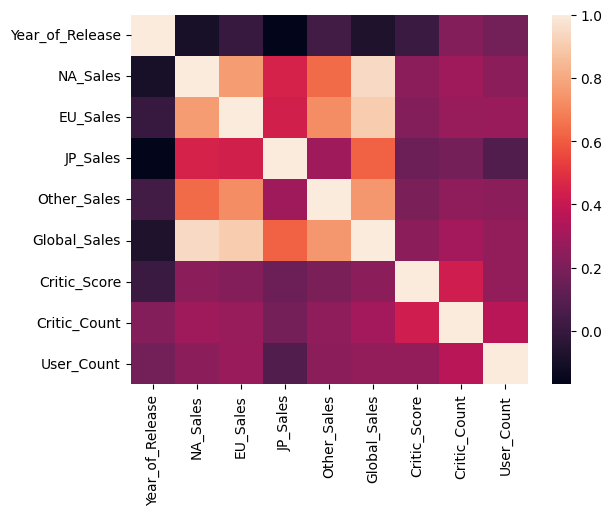

In [19]:
#display heatmap thanks to seaborn
sns.heatmap(df_num.corr())

**Expected output:**\
<img src="./image/heatmap.png"/>

## III) Data Cleaning

You will remember that during our analysis we noticed that some columns were infested with undefined values.\
When a column contains too much undefined data, it is not usable.


**Exerice :**\
Remove the columns from the dataset: ```Critic_Score```, ```Critic_Count```, ```User_Score```, ```User_Count```, ```Developer```, ```Rating```.

In [21]:
df = pd.read_csv('video_games.csv')
print('Before ', df.shape)

#Remove columns: Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating.
df = df.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'], axis=1)

print('After ', df.shape)

Before  (16719, 16)
After  (16719, 10)


**Expected Result:**\
Before  (16719, 16)\
After  (16719, 10)

When we have a column that contains few undefined values and to be able to work with it anyway it is frequent to replace the defined values by the mode.\
The mode is the value that appears most in the column.\
Be careful, this technique must be used sparingly or the results may be strongly biased.

**Exercice :**\
Replace the undefined values in the ```Genre``` column with the mode.

In [22]:
# Filling NaN values in Genre with the mode
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

When a column that contains unique values also contains undefined values, we prefer to delete the rows that have undefined values.\
This method is used for proper names, or ids for example.

**Exerice :**\
Delete the rows that have an undefined ```Name``` value.

In [24]:
# Removing the 2 missing rows from Name

print('Before ', df.shape)
# code here -> 
df = df.dropna(subset=['Name'])
print('After ', df.shape)

Before  (16719, 10)
After  (16717, 10)


**Expected Result:**\
Before  (16719, 10)\
After  (16717, 10)

**Exercice :**\
Perform the same task for the undefined values in the column : ```Year_of_Release```.

In [25]:
# Droping 269 missing rows from Year_of_Release

print('Before ', df.shape)
# code here -> 
df = df.dropna(subset=['Year_of_Release'])
print('After ', df.shape)

Before  (16717, 10)
After  (16448, 10)


**Expected Result:**\
Before  (16717, 10)\
After  (16448, 10)

**Exercice :**\
Perform the same task for the undefined values in the column : ```Publisher```.

In [26]:
# Removing the 54 missing rows from Publisher

print('Before ', df.shape)
# code here -> 
df = df.dropna(subset=['Publisher'])
print('After ', df.shape)
print('-'*20)
print(df.isna().sum())

Before  (16448, 10)
After  (16416, 10)
--------------------
Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64


**Expected output:**\
Before  (16448, 10)\
After  (16416, 10)\
--------------------\
Name       &nbsp;        0\
Platform    &nbsp;       0\
Year_of_Release &nbsp;   0\
Genre        &nbsp;      0\
Publisher   &nbsp;       0\
NA_Sales    &nbsp;       0\
EU_Sales     &nbsp;      0\
JP_Sales    &nbsp;       0\
Other_Sales  &nbsp;      0\
Global_Sales   &nbsp;    0\
dtype: int64

## IV) Data Visualization

We now have clean data that can be analyzed.\
The previous steps are very important for our analysis to be relevant, that's the job of a data scientist.

Now we will perform an analysis on the global sales of video games.

**Exercice :**\
Get the 10 best-selling games with their ```Global_sales``` and their ```name```.

In [27]:
# Top 10 Games by Global Sales
df[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,29.80
7,Wii Play,28.92
8,New Super Mario Bros. Wii,28.32
9,Duck Hunt,28.31


**Expected output:**\
<img src="./image/games_per_gs.png"/>

We have a dataframe that contains the 10 best selling games in history.\
It's good but it's not very visual, in general to present data analysis work, a part of data visualization is done in order to render our results in graphical form.
To realize data visualization, there are several interesting libraries and notably Seaborn a library based on the matplotlib library.

**Exercice :**\
Display a graph to see the 10 best selling games in history.

<AxesSubplot: xlabel='Global_Sales', ylabel='Name'>

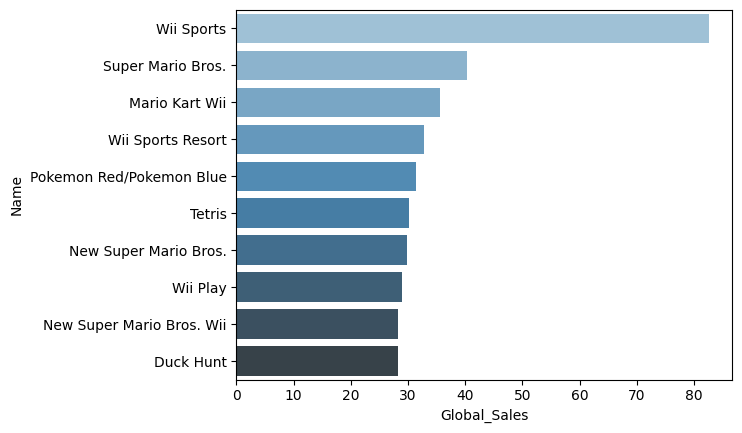

In [31]:
# Graph top 10 games by global sales.
sns.barplot(x='Global_Sales', y='Name', data=df.sort_values(by='Global_Sales', ascending=False).head(10))

**Expected output:**\
<img src="./image/graph.png"/>

# Congratz !

During this workshop, we were able to draw conclusions from the data, such as which games were the most sold.\
But all of this required a first understanding of the data, and then a cleaning of the data.\
Who knows what impertinent results we would have had if we had not cleaned the data?

Thank you for attending this workshop.\
Good job, your job is done for now.\
You got way above our expectation, and you're entirely ready to do Data Analysis in any other mission.